In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark Clustering").getOrCreate()

In [3]:
df = pd.read_csv("houses_madrid.csv")
pd.set_option("display.max_columns", None)

In [4]:
df.sample()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
991,991,20751,Piso en venta en calle Canteras de Tilly,"Casco Histórico de Vicálvaro, Madrid",65.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle Canteras de Tilly,True,Calle Canteras de Tilly,NaN,NaN,1,False,NaN,Neighborhood 125: Casco Histórico de Vicálvaro...,sale,744,NaN,False,150000,2308,True,HouseType 1: Pisos,True,False,1978.0,NaN,NaN,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [6]:
df.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,raw_address,is_exact_address_hidden,street_name,street_number,portal,floor,is_floor_under,door,neighborhood_id,operation,rent_price,rent_price_by_area,is_rent_price_known,buy_price,buy_price_by_area,is_buy_price_known,house_type_id,is_renewal_needed,is_new_development,built_year,has_central_heating,has_individual_heating,are_pets_allowed,has_ac,has_fitted_wardrobes,has_lift,is_exterior,has_garden,has_pool,has_terrace,has_balcony,has_storage_room,is_furnished,is_kitchen_equipped,is_accessible,has_green_zones,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,NaN,NaN,"Calle de Godella, 64",False,Calle de Godella,64,NaN,3,False,NaN,Neighborhood 135: San Cristóbal (1308.89 €/m2)...,sale,471,NaN,False,85000,1328,True,HouseType 1: Pisos,False,False,1960.0,NaN,NaN,NaN,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,NaN,NaN,Calle de la del Manojo de Rosas,True,Calle de la del Manojo de Rosas,NaN,NaN,4,False,NaN,Neighborhood 132: Los Ángeles (1796.68 €/m2) -...,sale,666,NaN,False,129900,1856,True,HouseType 1: Pisos,True,False,NaN,NaN,NaN,NaN,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,NaN,NaN,"Calle del Talco, 68",False,Calle del Talco,68,NaN,1,False,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,722,NaN,False,144247,1535,True,HouseType 1: Pisos,False,False,NaN,False,True,NaN,NaN,True,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,NaN,NaN,Calle Pedro Jiménez,True,Calle Pedro Jiménez,NaN,NaN,Bajo,True,NaN,Neighborhood 134: San Andrés (1617.18 €/m2) - ...,sale,583,NaN,False,109900,1717,True,HouseType 1: Pisos,False,False,1955.0,NaN,NaN,NaN,NaN,NaN,True,True,NaN,NaN,NaN,NaN,True,NaN,NaN,True,NaN,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,NaN,NaN,Carretera de Villaverde a Vallecas,True,Carretera de Villaverde a Vallecas,NaN,NaN,4,False,NaN,Neighborhood 133: Los Rosales (1827.79 €/m2) -...,sale,1094,NaN,False,260000,2407,True,HouseType 1: Pisos,False,False,2003.0,NaN,NaN,NaN,True,True,True,True,NaN,True,NaN,NaN,True,NaN,NaN,NaN,True,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


In [7]:
df.buy_price_by_area.describe()

count    21742.000000
mean      4020.523871
std       1908.418774
min        447.000000
25%       2551.000000
50%       3720.000000
75%       5000.000000
max      18889.000000
Name: buy_price_by_area, dtype: float64

In [8]:
df = df.filter(["sq_mt_built",'buy_price',"n_rooms","n_bathrooms","has_parking","built_year",'is_orientation_south',"has_lift",'has_central_heating'])

In [9]:
df.head()

,sq_mt_built,buy_price,n_rooms,n_bathrooms,has_parking,built_year,is_orientation_south,has_lift,has_central_heating
0,64.0,85000,2,1.0,False,1960.0,False,False,NaN
1,70.0,129900,3,1.0,False,NaN,NaN,True,NaN
2,94.0,144247,2,2.0,False,NaN,NaN,True,False
3,64.0,109900,2,1.0,False,1955.0,True,True,NaN
4,108.0,260000,2,2.0,True,2003.0,True,True,NaN


In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

sq_mt_built             0
buy_price               0
n_rooms                 0
n_bathrooms             0
has_parking             0
built_year              0
is_orientation_south    0
has_lift                0
has_central_heating     0
dtype: int64

In [12]:
df.sample(10)

,sq_mt_built,buy_price,n_rooms,n_bathrooms,has_parking,built_year,is_orientation_south,has_lift,has_central_heating
9800,100.0,300000,3,2.0,True,1985.0,True,True,False
8847,210.0,790000,5,3.0,True,1985.0,True,True,True
9297,245.0,765000,5,3.0,True,1974.0,True,True,True
4108,192.0,650000,4,3.0,True,1970.0,False,True,True
18439,123.0,749000,2,2.0,False,1900.0,True,True,False
8239,60.0,345000,1,1.0,True,2004.0,False,True,False
11182,109.0,599000,2,2.0,False,1962.0,True,True,False
12249,225.0,750000,5,3.0,False,1964.0,True,True,True
13045,92.0,175000,3,1.0,False,1970.0,True,False,False
7836,121.0,375000,3,1.0,False,1962.0,False,True,False


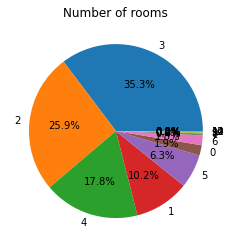

In [13]:
building_types = df['n_rooms'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Number of rooms')
plt.show()

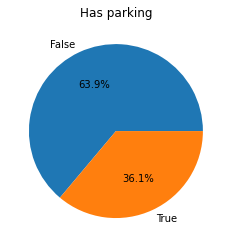

In [14]:
building_types = df['has_parking'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Has parking')
plt.show()

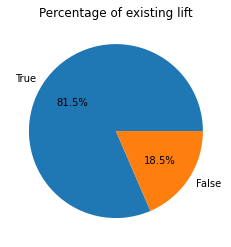

In [15]:
building_types = df['has_lift'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Percentage of existing lift')
plt.show()

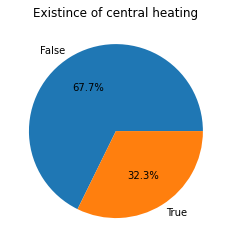

In [16]:
building_types = df['has_central_heating'].value_counts()
plt.pie(building_types.values, labels=building_types.index, autopct='%1.1f%%')
plt.title('Existince of central heating')
plt.show()

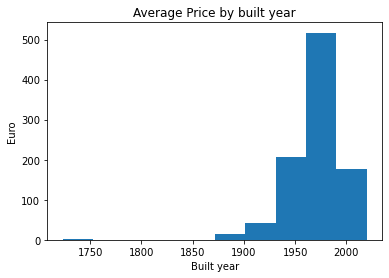

In [17]:
avg_prices = df.groupby(by='buy_price')['built_year'].mean()
plt.hist(avg_prices.values, bins=10)
plt.xlabel('Built year')
plt.ylabel('Euro')
plt.title('Average Price by built year')
plt.show()

1960.0    266
1970.0    264
1900.0    235
1965.0    210
1950.0    126
1968.0    106
1975.0    101
2008.0     98
2005.0     97
1940.0     96
Name: built_year, dtype: int64


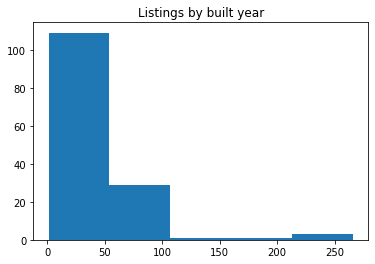

In [18]:
# Regions are encoded with numeric IDs.
regions = df['built_year'].value_counts()
print(regions.head(10))

plt.hist(regions.values, bins=5)
plt.title('Listings by built year')
plt.show()

<AxesSubplot:xlabel='buy_price', ylabel='Density'>

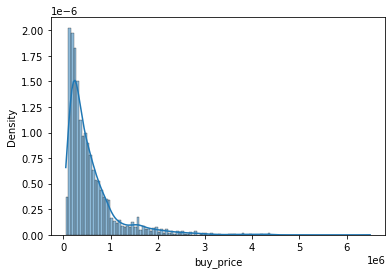

In [19]:
sns.histplot(df['buy_price'],kde=True,stat="density")

In [20]:
out = df['buy_price'].quantile(0.98)


df = df[df['buy_price']<out]

df.describe(include='all')

,sq_mt_built,buy_price,n_rooms,n_bathrooms,has_parking,built_year,is_orientation_south,has_lift,has_central_heating
count,4955.000000,4.955000e+03,4955.000000,4955.000000,4955,4955.000000,4955,4955,4955
unique,NaN,NaN,NaN,NaN,2,NaN,2,2,2
top,NaN,NaN,NaN,NaN,False,NaN,False,True,False
freq,NaN,NaN,NaN,NaN,3205,NaN,2564,4019,3385
mean,121.161655,5.245414e+05,2.837336,1.857921,NaN,1968.447427,NaN,NaN,NaN
std,71.826797,4.316717e+05,1.256464,0.935331,NaN,31.515768,NaN,NaN,NaN
min,15.000000,5.300000e+04,0.000000,1.000000,NaN,1723.000000,NaN,NaN,NaN
25%,72.000000,2.200000e+05,2.000000,1.000000,NaN,1956.000000,NaN,NaN,NaN
50%,100.000000,3.850000e+05,3.000000,2.000000,NaN,1970.000000,NaN,NaN,NaN
75%,148.000000,6.750000e+05,4.000000,2.000000,NaN,1993.500000,NaN,NaN,NaN


<AxesSubplot:xlabel='buy_price', ylabel='Density'>

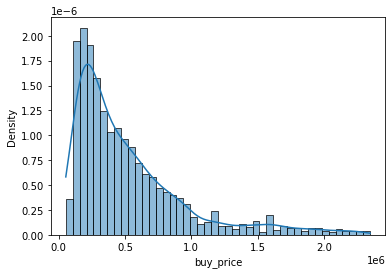

In [21]:
sns.histplot(df['buy_price'],kde=True,stat="density")

In [22]:
df.built_year.max()

2022.0

In [23]:
df=df[df.built_year<=2022]

In [24]:
df.built_year.max()

2022.0

<AxesSubplot:xlabel='built_year', ylabel='Density'>

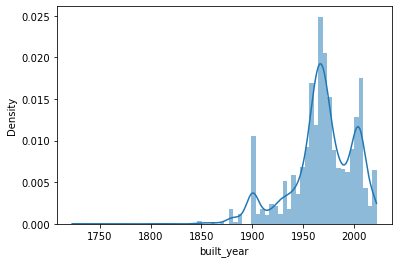

In [25]:
sns.histplot(df['built_year'],kde=True, stat="density", linewidth=0)

<AxesSubplot:xlabel='built_year', ylabel='Density'>

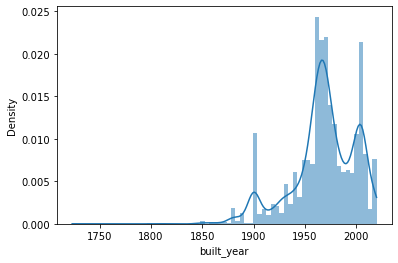

In [26]:
df = df[df['built_year']<2022]
sns.histplot(df['built_year'],kde=True, stat="density", linewidth=0)

In [27]:
data_cleaned = df.reset_index(drop=True)
df.to_csv('data_cleaned.csv')

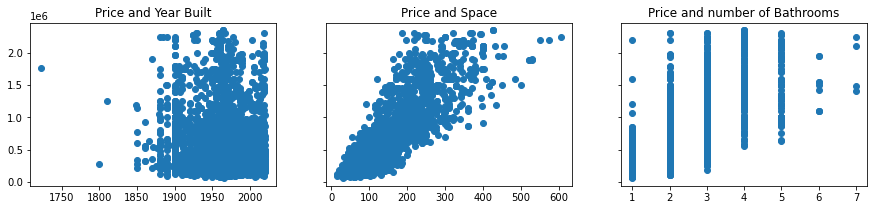

In [28]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['built_year'],data_cleaned['buy_price'])
ax1.set_title('Price and Year Built')
ax2.scatter(data_cleaned['sq_mt_built'],data_cleaned['buy_price'])
ax2.set_title('Price and Space')
ax3.scatter(data_cleaned['n_bathrooms'],data_cleaned['buy_price'])
ax3.set_title('Price and number of Bathrooms')


plt.show()

In [29]:
log_price = np.log(data_cleaned['buy_price'])

# Then we add it to our data frame
data_cleaned['log_price'] = log_price
data_cleaned.head()

,sq_mt_built,buy_price,n_rooms,n_bathrooms,has_parking,built_year,is_orientation_south,has_lift,has_central_heating,log_price
0,126.0,195000,4,2.0,True,1981.0,False,False,False,12.180755
1,85.0,131400,2,1.0,False,1950.0,False,False,False,11.786001
2,75.0,138000,3,1.0,True,1984.0,False,False,False,11.835009
3,70.0,145900,2,1.0,False,1968.0,True,False,False,11.890677
4,75.0,92500,1,1.0,False,2008.0,True,True,False,11.434964


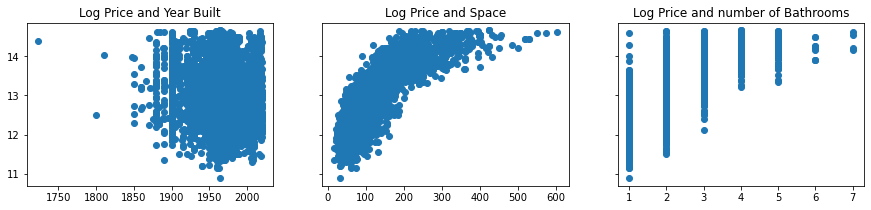

In [30]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['built_year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year Built')
ax2.scatter(data_cleaned['sq_mt_built'],data_cleaned['log_price'])
ax2.set_title('Log Price and Space')
ax3.scatter(data_cleaned['n_bathrooms'],data_cleaned['log_price'])
ax3.set_title('Log Price and number of Bathrooms')


plt.show()

In [31]:
data_cleaned = data_cleaned.drop(['buy_price'],axis=1)

In [32]:
data_cleaned.corr()

,sq_mt_built,n_rooms,n_bathrooms,has_parking,built_year,log_price
sq_mt_built,1.000000,0.701164,0.812135,0.311409,-0.028692,0.805136
n_rooms,0.701164,1.000000,0.627143,0.154510,-0.083012,0.532916
n_bathrooms,0.812135,0.627143,1.000000,0.320105,0.012927,0.764280
has_parking,0.311409,0.154510,0.320105,1.000000,0.480090,0.296909
built_year,-0.028692,-0.083012,0.012927,0.480090,1.000000,-0.127413
log_price,0.805136,0.532916,0.764280,0.296909,-0.127413,1.000000


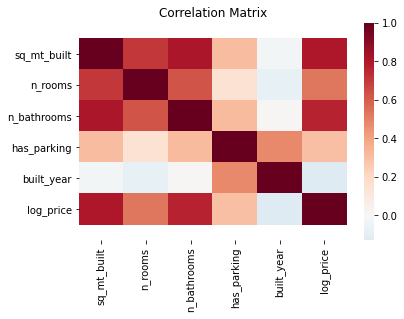

In [33]:
correlation = data_cleaned.corr()
ax = sns.heatmap(correlation, center=0, cmap='RdBu_r')
l, r = ax.get_ylim()
ax.set_ylim(l + 0.5, r - 0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix')
plt.show()

In [34]:
x = data_cleaned.iloc[:,0:7]
y = data_cleaned['log_price']

In [35]:
x.head()

,sq_mt_built,n_rooms,n_bathrooms,has_parking,built_year,is_orientation_south,has_lift
0,126.0,4,2.0,True,1981.0,False,False
1,85.0,2,1.0,False,1950.0,False,False
2,75.0,3,1.0,True,1984.0,False,False
3,70.0,2,1.0,False,1968.0,True,False
4,75.0,1,1.0,False,2008.0,True,True


In [36]:
y.head()

0    12.180755
1    11.786001
2    11.835009
3    11.890677
4    11.434964
Name: log_price, dtype: float64

In [37]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)


ExtraTreesRegressor()

In [38]:
print(model.feature_importances_)

[0.37309319 0.05236761 0.30345839 0.0104742  0.11141241 0.01243715
 0.13675706]


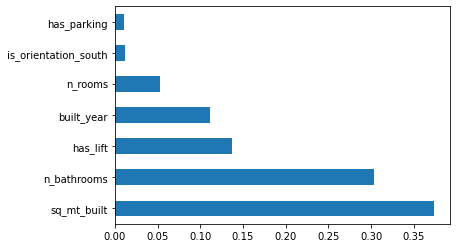

In [39]:
feat_importances = pd.Series(model.feature_importances_, index = x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
x_variables = data_cleaned[['sq_mt_built', 'n_bathrooms', 'built_year', 'n_rooms']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(x_variables.values, i) for i in range(x_variables.shape[1])]
vif["Features"] = x_variables.columns
vif

,VIF,Features
0,13.745492,sq_mt_built
1,14.831790,n_bathrooms
2,6.814239,built_year
3,12.173304,n_rooms


In [42]:
data_no_multicollinearity = data_cleaned.drop(['n_bathrooms','n_rooms'],axis=1)
x_variables = data_cleaned[['built_year','sq_mt_built']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x_variables.values, i) for i in range(x_variables.shape[1])]

vif["Features"] = x_variables.columns

vif

,VIF,Features
0,3.836022,built_year
1,3.836022,sq_mt_built


In [43]:
data_no_multicollinearity.head()

,sq_mt_built,has_parking,built_year,is_orientation_south,has_lift,has_central_heating,log_price
0,126.0,True,1981.0,False,False,False,12.180755
1,85.0,False,1950.0,False,False,False,11.786001
2,75.0,True,1984.0,False,False,False,11.835009
3,70.0,False,1968.0,True,False,False,11.890677
4,75.0,False,2008.0,True,True,False,11.434964


In [44]:
dummy_data = pd.get_dummies(data = data_no_multicollinearity,
                                   columns = ['has_parking', 'is_orientation_south',
                                    'has_lift', 'has_central_heating'], drop_first=True)

dummy_data.head()

,sq_mt_built,built_year,log_price,has_parking_True,is_orientation_south_True,has_lift_True,has_central_heating_True
0,126.0,1981.0,12.180755,1,0,0,0
1,85.0,1950.0,11.786001,0,0,0,0
2,75.0,1984.0,11.835009,1,0,0,0
3,70.0,1968.0,11.890677,0,1,0,0
4,75.0,2008.0,11.434964,0,1,1,0


In [45]:
dummy_data.columns.values
columns = ['log_price', 'sq_mt_built', 'built_year','has_parking_True', 'is_orientation_south_True', 'has_lift_True',
       'has_central_heating_True']
data_preprocessed = dummy_data[columns]
data_preprocessed.head()

,log_price,sq_mt_built,built_year,has_parking_True,is_orientation_south_True,has_lift_True,has_central_heating_True
0,12.180755,126.0,1981.0,1,0,0,0
1,11.786001,85.0,1950.0,0,0,0,0
2,11.835009,75.0,1984.0,1,0,0,0
3,11.890677,70.0,1968.0,0,1,0,0
4,11.434964,75.0,2008.0,0,1,1,0


In [46]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(3960, 6) (3960,)
(991, 6) (991,)


In [49]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_hat = reg.predict(x_train)

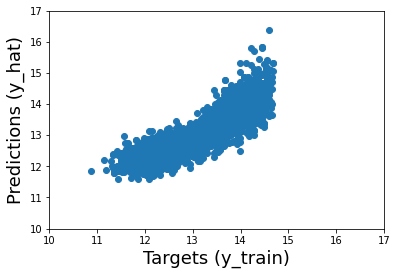

In [50]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

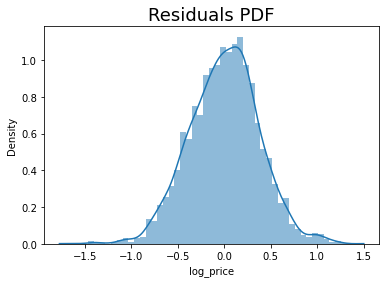

In [51]:
sns.histplot(y_train - y_hat, kde=True, stat="density", linewidth=0)
plt.title("Residuals PDF", size=18)



In [52]:
reg.score(x_train,y_train)


0.7474499167650566

In [53]:
reg.intercept_

12.8878310313894

In [54]:
reg.coef_

array([ 0.50794724, -0.15079158,  0.07726168, -0.01185917,  0.19933847,
        0.04389051])

In [55]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,sq_mt_built,0.507947
1,built_year,-0.150792
2,has_parking_True,0.077262
3,is_orientation_south_True,-0.011859
4,has_lift_True,0.199338
5,has_central_heating_True,0.043891


In [56]:
y_hat_test = reg.predict(x_test)

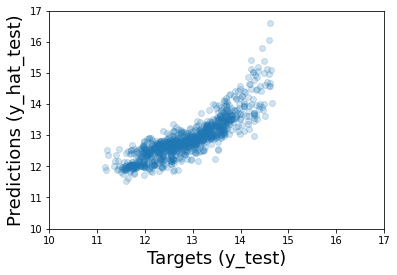

In [57]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [58]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,345251.997295,280000.0,-65251.997295,23.304285
1,382536.754724,244500.0,-138036.754724,56.456750
2,483645.739863,685000.0,201354.260137,29.394783
3,355327.678634,170000.0,-185327.678634,109.016282
4,750403.337859,795000.0,44596.662141,5.609643
...,...,...,...,...
986,398965.947594,649999.0,251033.052406,38.620529
987,162693.424526,127500.0,-35193.424526,27.602686
988,173741.451178,170000.0,-3741.451178,2.200854
989,393528.620761,435000.0,41471.379239,9.533650


In [59]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,9.910000e+02,9.910000e+02,9.910000e+02,991.000000
mean,5.389979e+05,5.169868e+05,-2.201108e+04,32.671114
std,8.071745e+05,4.167864e+05,6.234530e+05,36.878944
min,1.026857e+05,7.000000e+04,-1.424118e+07,0.088503
25%,2.603224e+05,2.250000e+05,-6.951784e+04,12.631009
50%,3.629505e+05,3.750000e+05,2.614030e+03,24.724170
75%,5.437427e+05,6.950000e+05,1.065040e+05,41.028604
max,1.649118e+07,2.300000e+06,1.178302e+06,632.941209


In [60]:
pd.options.display.max_rows = 20
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
375,16491177.19,2250000.00,-14241177.19,632.94
285,9555616.09,2200000.00,-7355616.09,334.35
816,7247738.09,1890000.00,-5357738.09,283.48
419,272736.62,73000.00,-199736.62,273.61
361,5069647.36,1495000.00,-3574647.36,239.11
...,...,...,...,...
180,343991.74,345000.00,1008.26,0.29
959,264407.82,265000.00,592.18,0.22
111,159645.35,159900.00,254.65,0.16
348,590569.71,590000.00,-569.71,0.10


In [61]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test, y_test))

from sklearn.metrics import r2_score
r2 = r2_score (y_hat_test, y_test)

print ('R-squared score', round (r2,2))

#adjusted R-squared:
adj_r2 = 1 - (1 - r2) * (254-1)/(254 - 6 - 1)
print ('Adjusted R-squared score', round (adj_r2,2))

Mean Absolute Error: 0.3000163942853142
Mean Squared Error: 0.14391213960149885
R-squared score 0.67
Adjusted R-squared score 0.67


In [63]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [64]:
from catboost import CatBoostRegressor

In [69]:
from sklearn.model_selection import RandomizedSearchCV


In [70]:
import time
start = time.time()
cb=CatBoostRegressor()

In [71]:
#parameters to vary as in technique 2
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [72]:
cb = RandomizedSearchCV(estimator = cb, param_distributions = grid,scoring='neg_mean_squared_error', 
                        n_iter = 10, cv = 2, random_state=42, n_jobs = -1,)

In [73]:
cb.fit(x_train,y_train, verbose = False)
end = time.time()
diff_cb = end - start
print ('Execution time for CB:', round(diff_cb,2), 'seconds')

C:\Users\abdel\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.10632943         nan         nan -0.1027131  -0.09930914 -0.10154084
 -0.10033751 -0.10144838 -0.09936756 -0.09969252]
  warnings.warn(


Execution time for CB: 51.04 seconds


In [74]:
cb.best_params_

{'learning_rate': 0.03, 'l2_leaf_reg': 9, 'depth': 4}

In [75]:
y_hat_cb = cb.predict(x_train)

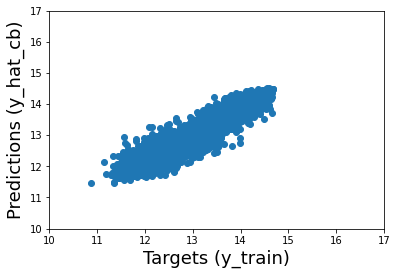

In [76]:
plt.scatter(y_train, y_hat_cb)

plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_cb)',size=18)


plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

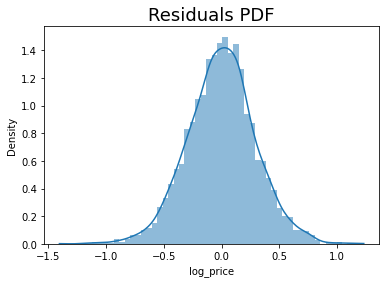

In [78]:
sns.histplot(y_train - y_hat_cb, kde=True, stat="density", linewidth=0)
plt.title("Residuals PDF", size=18)

In [79]:
from sklearn.metrics import r2_score

r2 = r2_score (y_train, y_hat_cb)

print ('R-squared score', round (r2,2))

R-squared score 0.85


In [80]:
y_hat_test_cb=cb.predict(x_test)

<AxesSubplot:xlabel='log_price', ylabel='Density'>

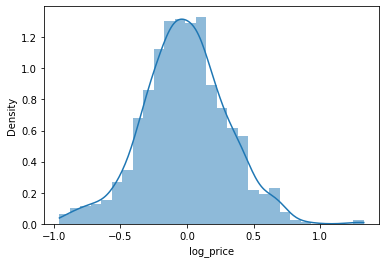

In [81]:
sns.histplot(y_test-y_hat_test_cb, kde=True, stat="density", linewidth=0)

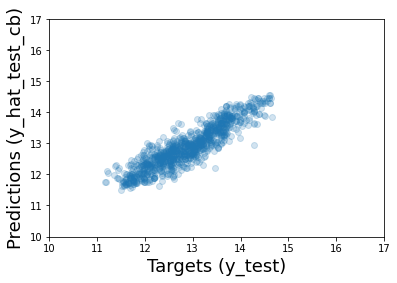

In [82]:
plt.scatter(y_test,y_hat_test_cb, alpha = 0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test_cb)',size=18)
plt.xlim(10,17)
plt.ylim(10,17)
plt.show()

In [83]:
df_pf = pd.DataFrame(np.exp(y_hat_test_cb), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_pf['Target'] = np.exp(y_test)

df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']


df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,355998.10,280000.00,-75998.10,27.14
1,323566.63,244500.00,-79066.63,32.34
2,625003.67,685000.00,59996.33,8.76
3,345747.64,170000.00,-175747.64,103.38
4,863430.94,795000.00,-68430.94,8.61
...,...,...,...,...
986,412572.11,649999.00,237426.89,36.53
987,134840.57,127500.00,-7340.57,5.76
988,154720.16,170000.00,15279.84,8.99
989,418866.58,435000.00,16133.42,3.71


In [84]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,991.00,991.00,991.00,991.00
mean,507113.73,516986.79,9873.05,26.06
std,385737.91,416786.40,179504.87,24.53
min,99174.36,70000.00,-622331.11,0.03
25%,237841.62,225000.00,-72538.45,9.10
50%,372617.55,375000.00,-7840.33,20.11
75%,650765.06,695000.00,80179.33,34.96
max,2130986.61,2300000.00,1268552.43,160.73


In [85]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'], ascending = False)

,Prediction,Target,Residual,Difference%
501,440640.89,169000.00,-271640.89,160.73
154,841911.62,325000.00,-516911.62,159.05
419,180844.24,73000.00,-107844.24,147.73
978,730120.90,295000.00,-435120.90,147.50
36,219872.40,89000.00,-130872.40,147.05
...,...,...,...,...
399,658661.94,660000.00,1338.06,0.20
281,200292.37,199900.00,-392.37,0.20
37,238175.55,238000.00,-175.55,0.07
427,145925.75,146000.00,74.25,0.05


In [86]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_hat_test_cb, y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_hat_test_cb, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_hat_test_cb, y_test)))

r2_cb = r2_score (y_hat_test_cb, y_test)

print ('R-squared score', round (r2_cb,2))

#adjusted R-squared:
adj_r2_cb = 1 - ((1 - r2_cb) * (254-1)/(254 - 8 - 1))
print ('Adjusted R-squared score', round (adj_r2_cb,2))

Mean Absolute Error: 0.24749741301506334
Mean Squared Error: 0.10126199768085847
Root Mean Squared Error: 0.31821690351214604
R-squared score 0.79
Adjusted R-squared score 0.78


In [ ]:
from pyspark.sql import SparkSession 

In [ ]:
data = spark.read.format("csv")\
            .option("header", "true")\
            .load("data_cleaned.csv", header = True)


In [ ]:
data.show()

In [ ]:
Built_Year = data.select("built_year").distinct()

In [ ]:
Built_Year.show()

In [ ]:
Number_Rooms = data.filter(data.n_rooms == "3")

In [ ]:
Number_Rooms.show()

In [ ]:

lift_heating = data [(data.has_lift == "True") & (data.has_central_heating == "True")]

In [ ]:
lift_heating.show()